In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
cap = cv2.VideoCapture(0)
ret, img = cap.read()

while 1:
    ret, img = cap.read()
    
    if ret:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hor_der = cv2.Sobel(gray, ddepth = -1 , dx = 1, dy = 0, ksize = 5)
        ver_der = cv2.Sobel(gray, ddepth = -1 , dx = 0, dy = 1, ksize = 5)
        # subtracting the vertical derivative from the horizontal derivative
        diff = cv2.subtract(hor_der, ver_der)
        #  convert the output in 8-bit unsigned integer format
        diff = cv2.convertScaleAbs(diff)
        #  applying Gaussian blur
        blur = cv2.GaussianBlur(diff, (3,3), 0)
        # applying binary threshold
        ret, thres = cv2.threshold(blur, 225, 255, cv2.THRESH_BINARY)
        # filling gaps between bars
        dilated = cv2.dilate(thres, None, iterations = 10)
        # eliminating unwanted regions and strinking required region
        eroded =  cv2.erode(dilated, None, iterations = 15)
        
        # finding contours in this image
        (contours, hierarchy) = cv2.findContours(eroded, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        # biggest contour in image would be the contour corresponding to the barcode
        areas = [cv2.contourArea(temp) for temp in contours]
        max_index = np.argmax(areas)
        largest_contour=contours[max_index]
        # getting the coordinates of the bounding rectangle for the contour
        x,y,width,height = cv2.boundingRect(largest_contour)
        cv2.rectangle(img,(x,y),(x+width,y+height),(0,255,0),2)
        
        
        cv2.imshow("video",img)
    
    if cv2.waitKey(1) == 27 :
        break
        
    
    
    
cv2.destroyAllWindows()
cap.release()

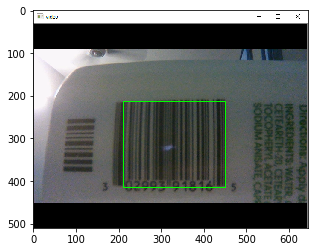